<a href="https://colab.research.google.com/github/dakshnpci/NPCIMLTraining/blob/master/BoostingExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:


# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load data
dataset = loadtxt('https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 77.95%


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [0]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

In [0]:
titanic_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/titanic_train.csv")     # Importing training dataset using pd.read_csv


In [0]:
titanic_data.Embarked = titanic_data.Embarked.fillna(titanic_data['Embarked'].mode()[0])
median_age = titanic_data.Age.median()
median_fare = titanic_data.Fare.median()
titanic_data.Age.fillna(median_age, inplace = True)
titanic_data.Fare.fillna(median_fare, inplace = True)

In [0]:
titanic_data.drop('Cabin', axis = 1,inplace = True)

In [13]:
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']+1
titanic_data['GenderClass'] = titanic_data.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'],axis=1)
titanic_data = pd.get_dummies(titanic_data, columns=['GenderClass','Embarked'], drop_first=True)
titanic = titanic_data.drop(['Name','Ticket','Sex','SibSp','Parch'], axis = 1)
titanic.head()

,PassengerId,Survived,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,7.2500,2,0,1,0,1
1,2,1,1,38.0,71.2833,2,1,0,0,0
2,3,1,3,26.0,7.9250,1,1,0,0,1
3,4,1,1,35.0,53.1000,2,1,0,0,1
4,5,0,3,35.0,8.0500,1,0,1,0,1


In [15]:
X = titanic.loc[:,titanic.columns != 'Survived']
y = titanic.Survived 
X.head()

,PassengerId,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,1,3,22.0,7.2500,2,0,1,0,1
1,2,1,38.0,71.2833,2,1,0,0,0
2,3,3,26.0,7.9250,1,1,0,0,1
3,4,1,35.0,53.1000,2,1,0,0,1
4,5,3,35.0,8.0500,1,0,1,0,1


In [16]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)


/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(random_state = 0,
                                n_estimators = 15,
                                min_samples_split = 2,
                                min_samples_leaf = 1)

model1.fit(X_train, y_train)
y_pred_test = model1.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy score for test data using the model with parameter specification:', accuracy_score(y_test,y_pred_test1))

from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)


Accuracy score for test data using the model with parameter specification: 0.7932960893854749
                 Predicted Died  Predicted Survived
Actual Died                  96                  10
Actual Survived              27                  46


In [19]:
from xgboost import XGBClassifier
model1 = XGBClassifier()
model1.fit(X_train, y_train)
y_pred_test = model1.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy score for test data using the model with parameter specification:', accuracy_score(y_test,y_pred_test1))

from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)



Accuracy score for test data using the model with parameter specification: 0.7932960893854749
                 Predicted Died  Predicted Survived
Actual Died                  97                   9
Actual Survived              28                  45


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [23]:
from sklearn import preprocessing
from sklearn import cross_validation
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
model1 = GradientBoostingClassifier()
model1.fit(X_train, y_train)
y_pred_test = model1.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy score for test data using the model with parameter specification:', accuracy_score(y_test,y_pred_test1))

from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

Accuracy score for test data using the model with parameter specification: 0.7932960893854749
                 Predicted Died  Predicted Survived
Actual Died                  97                   9
Actual Survived              28                  45


/usr/local/lib/python3.6/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [0]:
 #!/usr/bin/env python -W ignore::DeprecationWarning
 
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output
titanic_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/titanic_train.csv")     # Importing training dataset using pd.read_csv

titanic_data.Embarked = titanic_data.Embarked.fillna(titanic_data['Embarked'].mode()[0])
median_age = titanic_data.Age.median()
median_fare = titanic_data.Fare.median()
titanic_data.Age.fillna(median_age, inplace = True)
titanic_data.drop('Cabin', axis = 1,inplace = True)
titanic_data.Fare.fillna(median_fare, inplace = True)
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']+1
titanic_data['GenderClass'] = titanic_data.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'],axis=1)
titanic_data = pd.get_dummies(titanic_data, columns=['GenderClass','Embarked'], drop_first=True)
titanic = titanic_data.drop(['Name','Ticket','Sex','SibSp','Parch'], axis = 1)
titanic.head()
X = titanic.loc[:,titanic.columns != 'Survived']
y = titanic.Survived 
# X.head()

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# print(X_train)
# print(len(X_train))
# print(len(y_train))
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
    
from sklearn import preprocessing
from sklearn import cross_validation
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
from sklearn.grid_search import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

clf = XGBClassifier(silent=True)
cv = cross_validation.KFold(len(X), n_folds=20, shuffle=True, random_state=1)

# # Grid 1
# grid = {'learning_rate':[0, 0.01], 
#         'n_estimators': [100, 200, 500,1000],
#         'max_depth':[3, 4, 5,10], 
#         'booster':['gbtree', 'gblinear', 'dart']
# #        'reg_lambda':[0, 0.01, 0.10, 0.50, 1]
#        }

# Grid 2

grid = {'learning_rate':[ 0.01], 
        'n_estimators': [200],
        'max_depth':[4,30], 
        'booster':['gbtree'],
       'reg_lambda':[0, 0.01]
       }

# scores = cross_validation.cross_val_score(clf, X, y, cv=cv, n_jobs=1, scoring='accuracy')
search = GridSearchCV(estimator=clf, param_grid=grid, scoring='accuracy', n_jobs=-1, refit=True, cv=cv)
# search.fit(X_train,y_train)
search.fit(X,y)

y_pred_test = search.predict(X_test)
print('Accuracy score for test data using the model with parameter specification:', accuracy_score(y_test,y_pred_test))

from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)
search.best_estimator_


In [0]:
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare

In [55]:
#!/usr/bin/env python -W ignore::DeprecationWarning
 
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()
from collections import Counter
from subprocess import check_output
titanic_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/titanic_train.csv")     # Importing training dataset using pd.read_csv

# Get the outlier out (2 per column)
Outliers_to_drop = detect_outliers(titanic_data,2,["Age","SibSp","Parch","Fare"])
# print(titanic_data.loc[Outliers_to_drop]) # Show the outliers rows)
titanic_data = titanic_data.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

# Get the title from name
# Get Title from Name
titanic_data_title = [i.split(",")[1].split(".")[0].strip() for i in titanic_data["Name"]]
titanic_data["Title"] = pd.Series(titanic_data_title)


# Convert to categorical values Title 
titanic_data["Title"] = titanic_data["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic_data["Title"] = titanic_data["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
titanic_data["Title"] = titanic_data["Title"].astype(int)

# Add Cabin Details 
titanic_data["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in titanic_data['Cabin'] ])
titanic_data = pd.get_dummies(titanic_data, columns = ["Cabin"],prefix="Cabin")

titanic_data.Embarked = titanic_data.Embarked.fillna(titanic_data['Embarked'].mode()[0])
median_age = titanic_data.Age.median()
median_fare = titanic_data.Fare.median()
titanic_data.Age.fillna(median_age, inplace = True)
# titanic_data.drop('Cabin', axis = 1,inplace = True)
titanic_data.Fare.fillna(median_fare, inplace = True)
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']+1
titanic_data['GenderClass'] = titanic_data.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'],axis=1)
titanic_data = pd.get_dummies(titanic_data, columns=['GenderClass','Embarked'], drop_first=True)
titanic = titanic_data.drop(['Name','Ticket','Sex','SibSp','Parch'], axis = 1)
titanic.head()
X = titanic.loc[:,titanic.columns != 'Survived']
y = titanic.Survived 
# X.head()

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# print(X_train)
# print(len(X_train))
# print(len(y_train))
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
    
from sklearn import preprocessing
from sklearn import cross_validation
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
from sklearn.grid_search import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold


# clf = GradientBoostingClassifier()
clf =  XGBClassifier(silent=True)
cv = cross_validation.KFold(len(X), n_folds=20, shuffle=True, random_state=1)
# cv = StratifiedKFold(n_splits=10)

# Grid 1
# grid = { 'loss': ['deviance'],
#         'learning_rate':[0.01], 
#         'n_estimators': [500],
#             'max_depth':[5], 
# #         'booster':['gbtree', 'gblinear', 'dart']
# #        'reg_lambda':[0, 0.01, 0.10, 0.50, 1]
#        }

# Grid 2

grid = {'learning_rate':[ 0.01], 
        'n_estimators': [200],
        'max_depth':[4], 
        'booster':['gbtree']
       }

# scores = cross_validation.cross_val_score(clf, X, y, cv=cv, n_jobs=1, scoring='accuracy')
search = GridSearchCV(estimator=clf, param_grid=grid, scoring='accuracy', n_jobs=-1, refit=True, cv=cv)
# search.fit(X_train,y_train)
search.fit(X,y)

y_pred_test = search.predict(X_test)

print('Accuracy score for XGBBOost Algorithm before Stacking test data using the model with parameter specification:', accuracy_score(y_test,y_pred_test))

from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)
print(search.best_estimator_)


X_train['XGboosttAnswers'] = search.predict(X_train)
X_test['XGboosttAnswers'] = search.predict(X_test)
X['XGboosttAnswers'] = search.predict(X)

#========================================================Addddingggg XGBOOST values to GBM==================================================
# print(X_train)
# print(len(X_train))
# print(len(y_train))
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
    
from sklearn import preprocessing
from sklearn import cross_validation
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
from sklearn.grid_search import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold


clf = GradientBoostingClassifier()
# clf =  XGBClassifier(silent=True)
cv = cross_validation.KFold(len(X), n_folds=30, shuffle=True, random_state=1)
# cv = StratifiedKFold(n_splits=10)

# Grid 1
grid = { 'loss': ['deviance'],
        'learning_rate':[0.01], 
        'n_estimators': [500],
            'max_depth':[5], 
#         'booster':['gbtree', 'gblinear', 'dart']
#        'reg_lambda':[0, 0.01, 0.10, 0.50, 1]
       }

# # Grid 2

# grid = {'learning_rate':[ 0.01], 
#         'n_estimators': [200],
#         'max_depth':[4], 
#         'booster':['gbtree']
#        }

# scores = cross_validation.cross_val_score(clf, X, y, cv=cv, n_jobs=1, scoring='accuracy')
search = GridSearchCV(estimator=clf, param_grid=grid, scoring='accuracy', n_jobs=-1, refit=True, cv=cv)
# search.fit(X_train,y_train)
search.fit(X,y)

y_pred_test = search.predict(X_test)

print('Accuracy score for GBM Algorithm After having XGBoost Datra using the model with parameter specification:', accuracy_score(y_test,y_pred_test))

from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)
print(search.best_estimator_)
print(X)


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


Accuracy score for XGBBOost Algorithm before Stacking test data using the model with parameter specification: 0.8700564971751412
                 Predicted Died  Predicted Survived
Actual Died                  90                  13
Actual Survived              10                  64
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Accuracy score for GBM Algorithm After having XGBoost Datra using the model with parameter specification: 0.9209039548022598
                 Predicted Died  Predicted Survived
Actual Died                  97                   6
Actual Survived               8                  66
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
     PassengerId  Pclass   Age     Fare  Title  Cabin_A  Cabin_B  Cabin_C  \
0              1       3  22.0   7.2500      2        0        0        0   
1              2       1  38.0  71.2833      1        0        0        1   
2              3

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


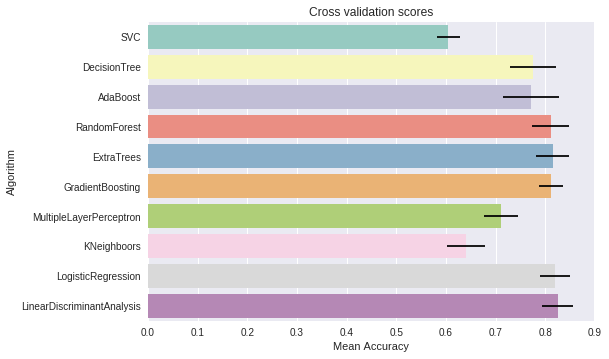

In [57]:
#!/usr/bin/env python -W ignore::DeprecationWarning
 
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()
from collections import Counter
from subprocess import check_output
titanic_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/titanic_train.csv")     # Importing training dataset using pd.read_csv

# Get the outlier out (2 per column)
Outliers_to_drop = detect_outliers(titanic_data,2,["Age","SibSp","Parch","Fare"])
# print(titanic_data.loc[Outliers_to_drop]) # Show the outliers rows)
titanic_data = titanic_data.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

# Get the title from name
# Get Title from Name
titanic_data_title = [i.split(",")[1].split(".")[0].strip() for i in titanic_data["Name"]]
titanic_data["Title"] = pd.Series(titanic_data_title)


# Convert to categorical values Title 
titanic_data["Title"] = titanic_data["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic_data["Title"] = titanic_data["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
titanic_data["Title"] = titanic_data["Title"].astype(int)

# Add Cabin Details 
titanic_data["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in titanic_data['Cabin'] ])
titanic_data = pd.get_dummies(titanic_data, columns = ["Cabin"],prefix="Cabin")

titanic_data.Embarked = titanic_data.Embarked.fillna(titanic_data['Embarked'].mode()[0])
median_age = titanic_data.Age.median()
median_fare = titanic_data.Fare.median()
titanic_data.Age.fillna(median_age, inplace = True)
# titanic_data.drop('Cabin', axis = 1,inplace = True)
titanic_data.Fare.fillna(median_fare, inplace = True)
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']+1
titanic_data['GenderClass'] = titanic_data.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'],axis=1)
titanic_data = pd.get_dummies(titanic_data, columns=['GenderClass','Embarked'], drop_first=True)
titanic = titanic_data.drop(['Name','Ticket','Sex','SibSp','Parch'], axis = 1)
titanic.head()
X = titanic.loc[:,titanic.columns != 'Survived']
y = titanic.Survived 
# X.head()

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# print(X_train)
# print(len(X_train))
# print(len(y_train))
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
    
from sklearn import preprocessing
from sklearn import cross_validation
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
from sklearn.grid_search import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve



kfold = StratifiedKFold(n_splits=10)

random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")





In [58]:
### META MODELING  WITH ADABOOST, RF, EXTRATREES and GRADIENTBOOSTING

# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsadaDTC.fit(X_train,y_train)

ada_best = gsadaDTC.best_estimator_
gsadaDTC.best_score_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed:    5.7s finished


0.7713068181818182

In [60]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsExtC.fit(X_train,y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  2.1min finished


0.8309659090909091

In [62]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_
gsRFC.best_estimator_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  2.5min finished


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [64]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsGBC.fit(X_train,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_


### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsSVMC.fit(X_train,y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_



Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   44.5s finished


Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:   41.2s finished


0.6590909090909091

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


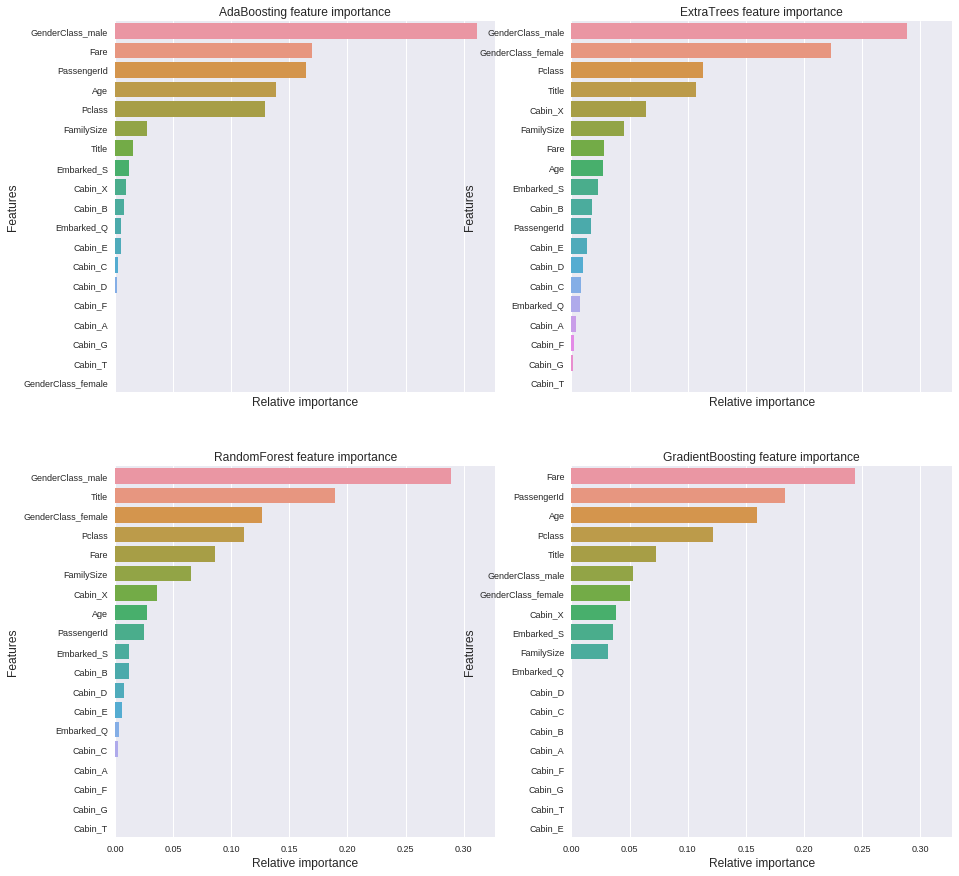

In [65]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("AdaBoosting", ada_best),("ExtraTrees",ExtC_best),("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

     RFC  ExtC  Ada  GBC  SVC
0      1     1    1    1    1
1      1     1    1    1    0
2      0     0    0    0    0
3      1     1    1    1    0
4      1     1    1    1    0
5      0     0    0    0    0
6      1     1    1    0    0
7      0     0    0    0    1
8      0     0    0    0    0
9      0     0    0    0    0
10     1     1    1    1    1
11     1     1    0    1    1
12     1     1    1    1    0
13     1     1    0    1    0
14     1     1    1    1    1
15     0     0    0    0    0
16     0     0    0    0    0
17     1     1    1    1    1
18     0     0    1    0    0
19     0     0    0    0    0
20     1     1    1    1    0
21     1     1    1    1    1
22     0     0    0    0    0
23     1     1    1    1    0
24     1     1    1    1    1
25     1     1    1    1    0
26     0     0    1    0    1
27     0     0    0    0    1
28     1     1    1    1    1
29     1     1    1    1    1
..   ...   ...  ...  ...  ...
147    1     1    1    1    1
148    0  

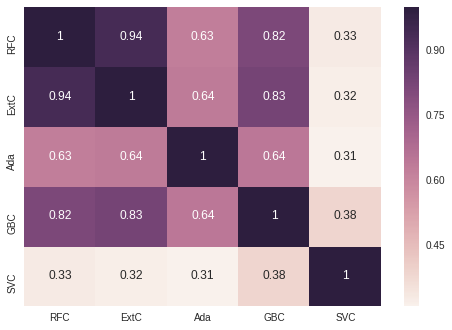

In [69]:
test_Survived_RFC = pd.Series(RFC_best.predict(X_test), name="RFC")
test_Survived_ExtC = pd.Series(ExtC_best.predict(X_test), name="ExtC")
test_Survived_SVMC = pd.Series(SVMC_best.predict(X_test), name="SVC")
test_Survived_AdaC = pd.Series(ada_best.predict(X_test), name="Ada")
test_Survived_GBC = pd.Series(GBC_best.predict(X_test), name="GBC")

# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_RFC,test_Survived_ExtC,test_Survived_AdaC,test_Survived_GBC, test_Survived_SVMC],axis=1)
print(ensemble_results)
g= sns.heatmap(ensemble_results.corr(),annot=True)
print(g)

In [74]:
# votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
# ('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = VotingClassifier(estimators=[('gbc',GBC_best)], voting='soft', n_jobs=-1)

votingC = votingC.fit(X_train, y_train)


y_pred_test = votingC.predict(X_test)

print('Accuracy score for Model Stack :', accuracy_score(y_test,y_pred_test))

from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)


Accuracy score for Model Stack : 0.8248587570621468
                 Predicted Died  Predicted Survived
Actual Died                  94                   9
Actual Survived              22                  52
